<a href="https://colab.research.google.com/gist/akshaybaweja/5401170e8bf816f64ad9cfeceead1eb9/recipe_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recipe Analysis

Dataset Source -- https://github.com/kanishk307/IndianFoodDatasetGeneration

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IndianFoodDatasetImages.csv",index_col=0)

In [7]:
df.head()

RecipeName  ...                                              image
Srno                                                     ...                                                   
1                                  Masala Karela Recipe  ...  https://www.archanaskitchen.com/images/archana...
2     टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...  ...  https://www.archanaskitchen.com/images/archana...
3     Ragi Semiya Upma Recipe - Ragi Millet Vermicel...  ...  https://www.archanaskitchen.com/images/archana...
4     Gongura Chicken Curry Recipe - Andhra Style Go...  ...  https://www.archanaskitchen.com/images/archana...
5     आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...  ...  https://www.archanaskitchen.com/images/archana...

[5 rows x 15 columns]

## Removing undesired columns

In [8]:
df.drop(["Instructions", "Ingredients",  "RecipeName"], axis = 1, inplace = True)
df.head()

TranslatedRecipeName  ...                                              image
Srno                                                     ...                                                   
1                           Masala Bitter Gourd Recipe   ...  https://www.archanaskitchen.com/images/archana...
2                           Spicy Tomato Rice (Recipe)   ...  https://www.archanaskitchen.com/images/archana...
3     Ragi Semiya Upma Recipe - Ragi Millet Vermicel...  ...  https://www.archanaskitchen.com/images/archana...
4     Gongura Chicken Curry Recipe - Andhra Style Go...  ...  https://www.archanaskitchen.com/images/archana...
5     Andhra Style Alam Pachadi Recipe - Adrak Chutn...  ...  https://www.archanaskitchen.com/images/archana...

[5 rows x 12 columns]

In [9]:
print(df.shape)

(6871, 12)


## Dropping for `null` values

In [10]:
df = df.dropna() 
df.head()

TranslatedRecipeName  ...                                              image
Srno                                                     ...                                                   
1                           Masala Bitter Gourd Recipe   ...  https://www.archanaskitchen.com/images/archana...
2                           Spicy Tomato Rice (Recipe)   ...  https://www.archanaskitchen.com/images/archana...
3     Ragi Semiya Upma Recipe - Ragi Millet Vermicel...  ...  https://www.archanaskitchen.com/images/archana...
4     Gongura Chicken Curry Recipe - Andhra Style Go...  ...  https://www.archanaskitchen.com/images/archana...
5     Andhra Style Alam Pachadi Recipe - Adrak Chutn...  ...  https://www.archanaskitchen.com/images/archana...

[5 rows x 12 columns]

In [11]:
print(df.shape)

(6847, 12)


In [12]:
df.dtypes

TranslatedRecipeName      object
TranslatedIngredients     object
PrepTimeInMins             int64
CookTimeInMins             int64
TotalTimeInMins            int64
Servings                   int64
Cuisine                   object
Course                    object
Diet                      object
TranslatedInstructions    object
URL                       object
image                     object
dtype: object

# Data Visualization

## Top Recipes

In [13]:
Top_recipies = df.TranslatedRecipeName.value_counts().head()
Top_recipies

Oats Ven Pongal Recipe                      2
Beetroot Chutney Recipe                     2
Onion Raita Recipe - Onion Raita Recipe     2
Masala Roasted Aloo Recipe                  2
Tomato Garlic Chutney Recipe                2
Name: TranslatedRecipeName, dtype: int64

## Data Cuisines

In [14]:
df['Cuisine'].value_counts()

Indian                  1154
Continental             1017
North Indian Recipes     936
South Indian Recipes     680
Italian Recipes          236
                        ... 
Dinner                     1
Jewish                     1
Shandong                   1
Lunch                      1
Side Dish                  1
Name: Cuisine, Length: 82, dtype: int64

## Types of Diets available in dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Types of Diet')

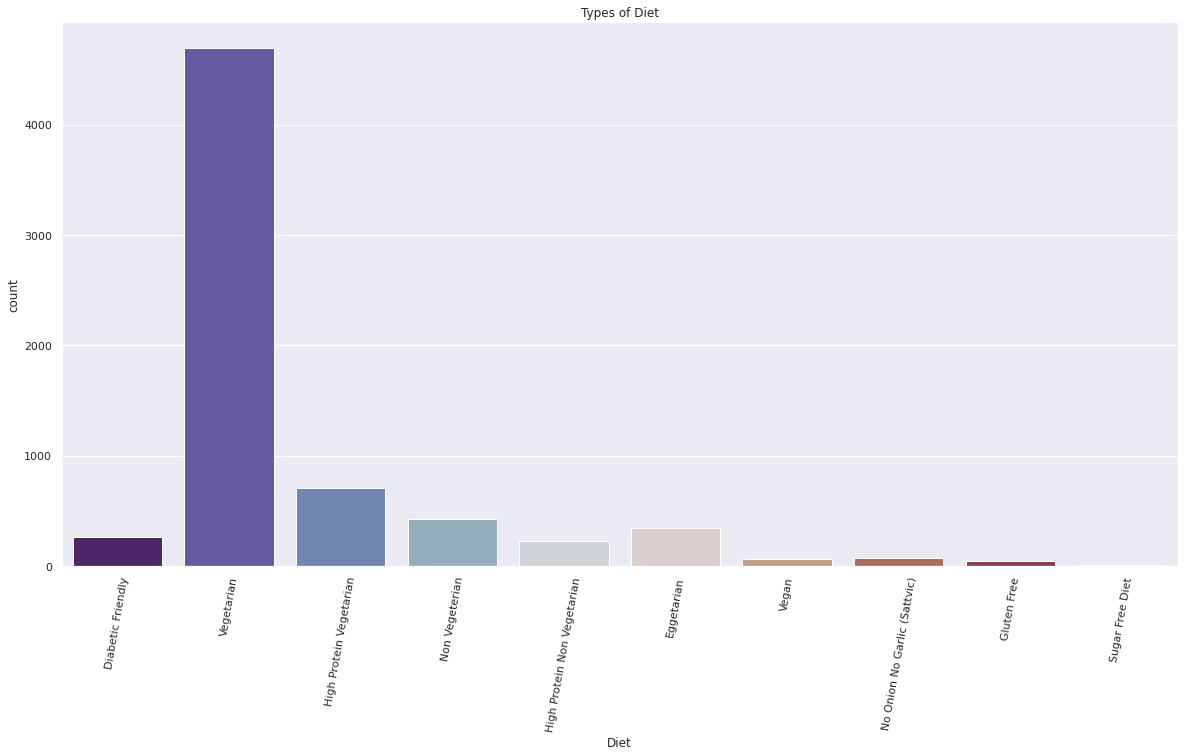

In [15]:
sns.set(rc={'figure.figsize':(20,10)})

sns.countplot('Diet',data=df,palette='twilight_shifted')
plt.xticks(rotation=80)
plt.title('Types of Diet')

## Comparing CookTimes, PrepTimes and TotalTimes

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.



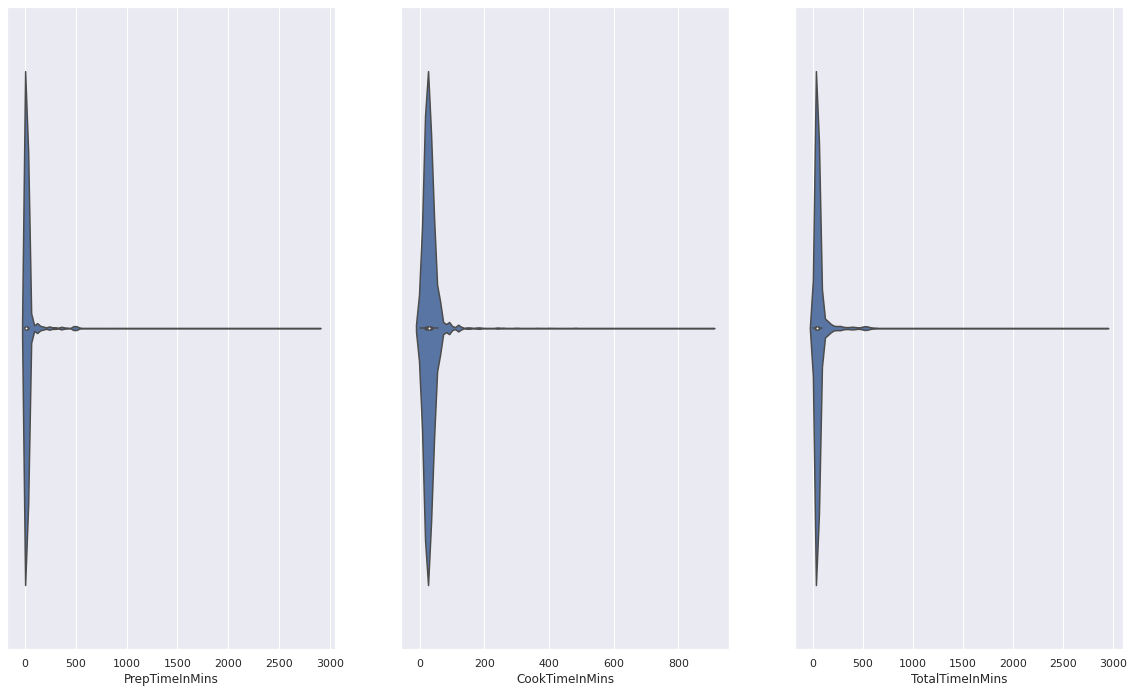

In [16]:
fig = plt.figure(figsize=(20,26))

ax1 = fig.add_subplot(231)
ax1=sns.violinplot(x='PrepTimeInMins',data=df, orient='v') 
ax2 = fig.add_subplot(232)
ax2=sns.violinplot(x='CookTimeInMins',data=df,orient='v')
ax3 = fig.add_subplot(233)
ax3=sns.violinplot(x='TotalTimeInMins',data=df, orient='v')

## Listing top 10 courses

Text(0, 0.5, 'count')

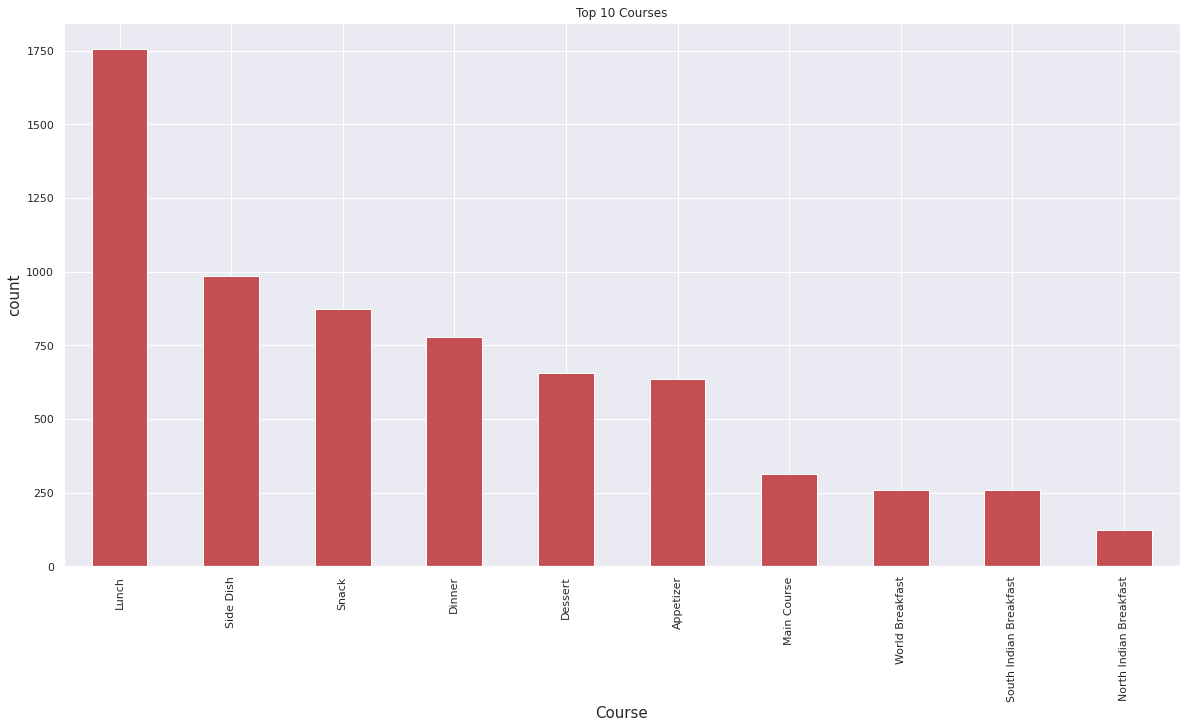

In [17]:
Top_10_courses=df.Course.value_counts()[:10].plot.bar(title="Top 10 Courses",color="r")
Top_10_courses.set_xlabel('Course',size=15)
Top_10_courses.set_ylabel('count',size=15)

## Listing Top 10 Cuisines

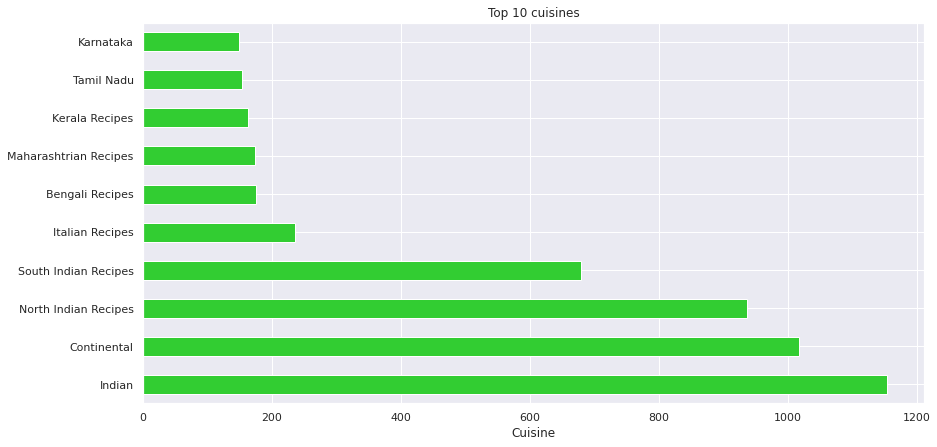

In [18]:
plt.rcParams['figure.figsize'] = 14,7
df.Cuisine.value_counts().nlargest(10).plot(kind = "barh",color="limegreen")
plt.title("Top 10 cuisines")
plt.xlabel("Cuisine")
plt.show()

## Listing time required for each Diet

Text(0.5, 1.0, 'Total time required for each Diet')

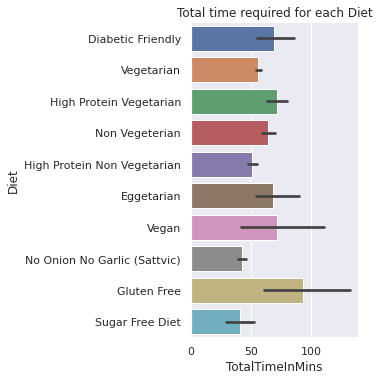

In [19]:
sns.set(rc={'figure.figsize':(50,10)})

sns.catplot(x='TotalTimeInMins',y='Diet',kind='bar',data=df)
plt.title('Total time required for each Diet')

## Listing time required for each course

Text(0.5, 1.0, 'Total time required for each Course')

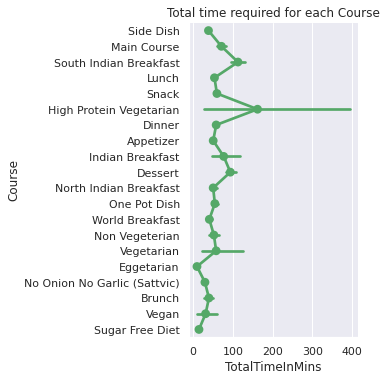

In [20]:
sns.set(rc={'figure.figsize':(50,30)})

sns.catplot(x='TotalTimeInMins',y='Course',kind='point',data=df,color='g')
plt.title('Total time required for each Course')

## Word Clouds

### Recipe Names

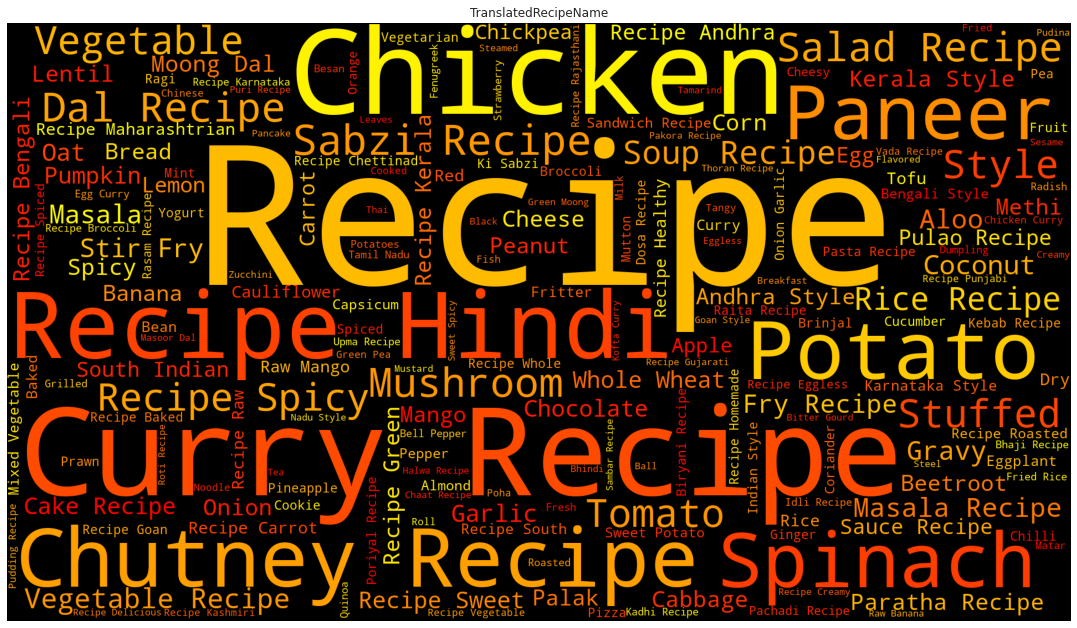

In [21]:
stopwords = set(STOPWORDS) 
def WC(values):
    wc = WordCloud(width = 1920, height = 1080, background_color ='black', stopwords = stopwords, min_font_size = 5,colormap='autumn').generate(values) 
    plt.figure(figsize=(20,11))
    plt.title("TranslatedRecipeName")
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
k = ''
for x in list(df['TranslatedRecipeName']):
    k+=''.join(x.split(','))
WC(k)

### Instructions

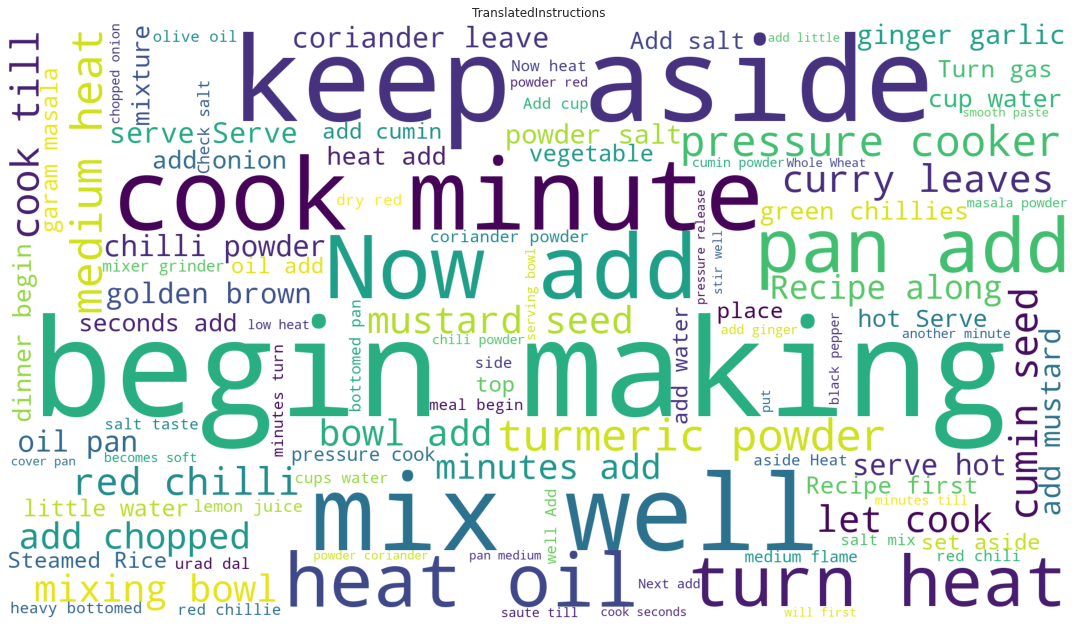

In [22]:
stopwords = set(STOPWORDS) 
def WC(values):
    wc = WordCloud(max_words=100,width = 1920, height = 1080, background_color ='white', stopwords = stopwords, min_font_size = 5).generate(values) 
    plt.figure(figsize=(20,11))
    plt.title("TranslatedInstructions")
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
k = ''
for x in list(df['TranslatedInstructions']):
    k+=''.join(x.split(','))
WC(k)

### Ingredients

In [23]:
from PIL import Image
india_mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Recipe Classification/india.png"))

In [24]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [25]:
transformed_india_mask = np.ndarray((india_mask.shape[0],india_mask.shape[1]), np.int32)
for i in range(len(india_mask)):
    transformed_india_mask[i] = list(map(transform_format, india_mask[i]))

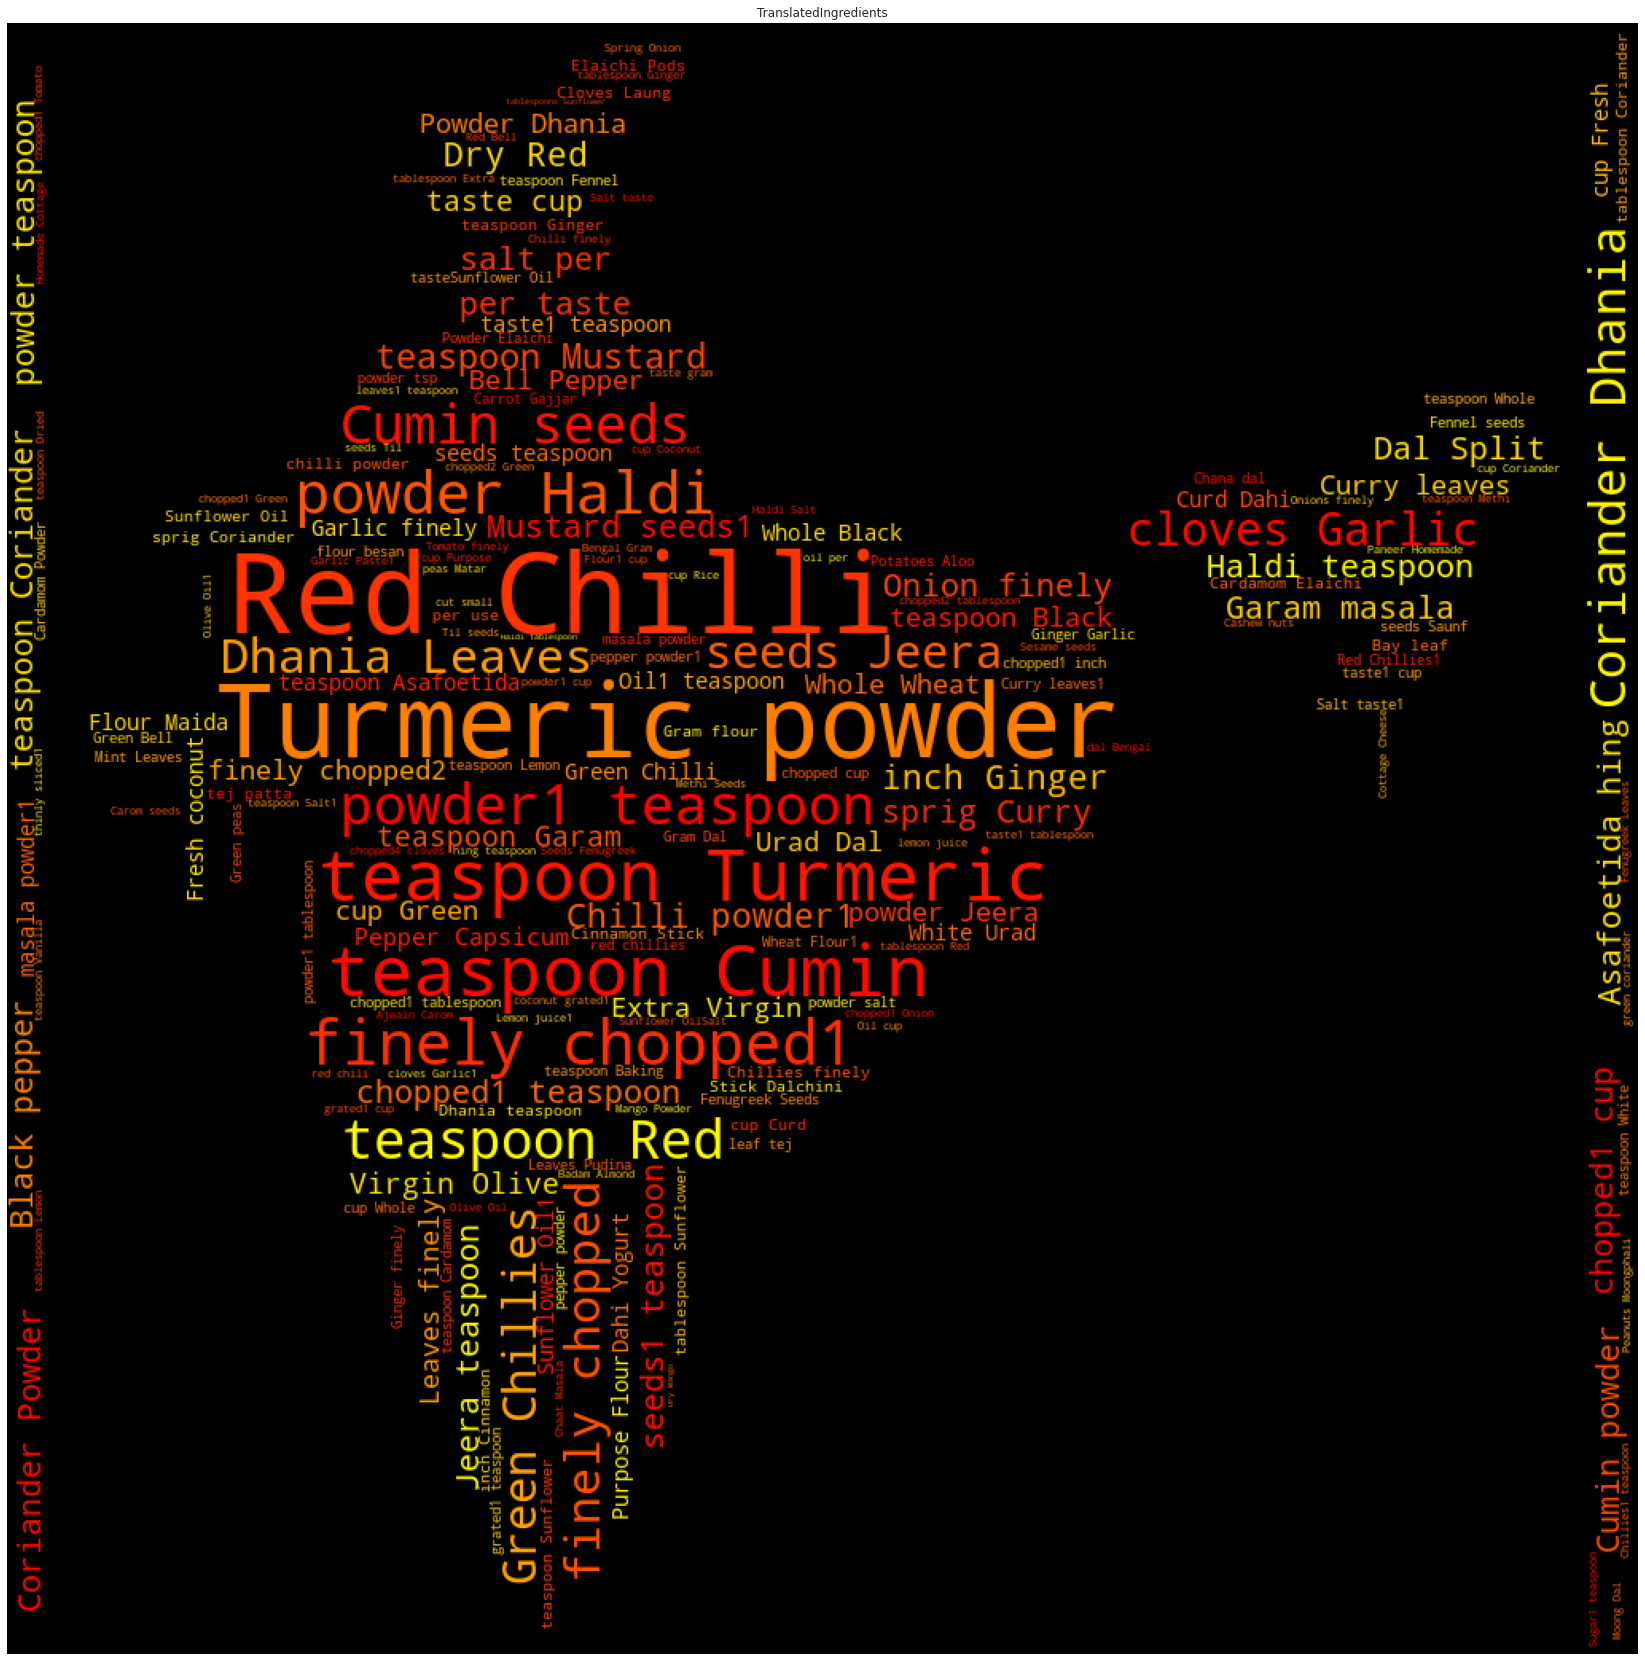

In [26]:
def WC(values):
    wc = WordCloud(width = 1920, height = 1080, background_color ='black', stopwords = stopwords, min_font_size = 5,colormap='autumn', mask=transformed_india_mask).generate(values)
    plt.figure()
    plt.title("TranslatedIngredients")
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

k = ''
for x in list(df['TranslatedIngredients']):
    k+=''.join(x.split(','))
WC(k)